In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

In [2]:
city_data = 'raw_data/city_data.csv'
ride_data = 'raw_data/ride_data.csv'

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

In [3]:
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [4]:
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [5]:
pyber_df = pd.merge(city_data_df,ride_data_df,how = 'inner',on = "city")
pyber_drop_df = pyber_df.drop_duplicates(subset = "ride_id")
pyber_drop_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [6]:
pyber_group_city_df = pyber_drop_df.groupby(["city"])

In [7]:
avg_fare_city = pyber_group_city_df["fare"].mean()
avg_fare_city.head()

city
Alvarezhaven    23.928710
Alyssaberg      20.609615
Anitamouth      37.315556
Antoniomouth    23.625000
Aprilchester    21.981579
Name: fare, dtype: float64

In [8]:
rides_per_city = pyber_group_city_df["ride_id"].count()
rides_per_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: ride_id, dtype: int64

In [9]:
drivers_per_city = pyber_group_city_df["driver_count"].count()
drivers_per_city.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: driver_count, dtype: int64

In [10]:
city_type = pyber_group_city_df["type"].unique()
city_type.head()

city
Alvarezhaven       [Urban]
Alyssaberg         [Urban]
Anitamouth      [Suburban]
Antoniomouth       [Urban]
Aprilchester       [Urban]
Name: type, dtype: object

In [11]:
total_stats_df = pd.DataFrame({"Average far($) per city":avg_fare_city,
                              "Total rides per city":rides_per_city,
                              "Total Drivers per city":drivers_per_city,
                              "City Type":city_type})
total_stats_df.sort_values("Total Drivers per city",ascending = False).head()

,Average far($) per city,City Type,Total Drivers per city,Total rides per city
city,,,,
Port Johnstad,25.882941,[Urban],34,34
Swansonbury,27.464706,[Urban],34,34
South Louis,27.087500,[Urban],32,32
Port James,31.806562,[Suburban],32,32
Alvarezhaven,23.928710,[Urban],31,31


In [12]:
pyber_citytype_df = pyber_drop_df.groupby(["type"])

In [13]:
total_fare = pyber_citytype_df["fare"].sum()
total_fare

type
Rural        4255.09
Suburban    19317.88
Urban       40078.34
Name: fare, dtype: float64

In [14]:
total_rides = pyber_citytype_df["ride_id"].count()
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [15]:
city_data_group_citytype = city_data_df.groupby(["type"])
total_drivers_per_city_type = city_data_group_citytype["driver_count"].sum()

In [16]:
total_drivers = total_drivers_per_city_type
total_drivers

type
Rural        104
Suburban     638
Urban       2607
Name: driver_count, dtype: int64

In [17]:
total_type_df = pd.DataFrame({"Total Fare": total_fare,
                             "Total Rides": total_rides,
                             "Total Drivers":total_drivers})
total_type_df

,Total Drivers,Total Fare,Total Rides
type,,,
Rural,104,4255.09,125
Suburban,638,19317.88,625
Urban,2607,40078.34,1625


In [18]:
total_drivers = total_type_df["Total Drivers"]
labels = city_data_df["type"].unique()

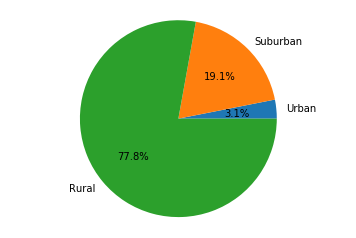

In [19]:
plt.pie(total_drivers, labels = labels,autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

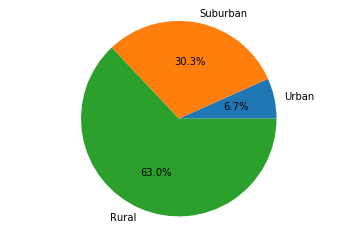

In [20]:
total_fare_citytype = total_type_df["Total Fare"]
plt.pie(total_fare_citytype, labels = labels,autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

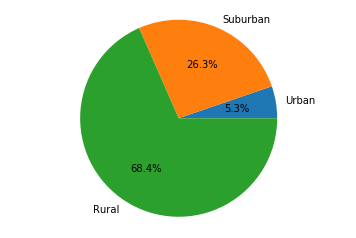

In [21]:
total_rides_citytype = total_type_df["Total Rides"]
plt.pie(total_rides_citytype, labels = labels,autopct = "%1.1f%%")
plt.axis("equal")
plt.show()

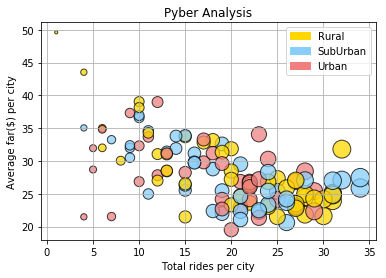

In [22]:
plt.scatter(total_stats_df["Total rides per city"],total_stats_df["Average far($) per city"], marker="o", 
            facecolors=["gold","lightskyblue","lightcoral"], edgecolors="black",
            s=total_stats_df["Total Drivers per city"]*10,alpha=0.75)
Gold = mpatches.Patch(color = "Gold", label = "Rural")
LightSkyBlue = mpatches.Patch(color = "lightskyblue", label = "SubUrban")
LightCoral = mpatches.Patch(color = "lightcoral", label = "Urban")
plt.legend(handles= [Gold,LightSkyBlue,LightCoral], loc = 'best')
plt.grid(True)
plt.title("Pyber Analysis")
plt.xlabel("Total rides per city")
plt.ylabel("Average far($) per city")
plt.show()